In [1]:
# !pip install spinesTS

In [2]:
import torch
from spinesTS.nn import DenseNet1DTorchModel

In [3]:
from spinesTS.preprocessing import split_series
from sklearn.preprocessing import StandardScaler
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score
from spinesTS.pipeline import Pipeline

from spinesTS.data import BuiltInSeriesData

from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [4]:
series_data = BuiltInSeriesData()

Existing CSV file list: 
>> >> >> >> >> >> >> >> >> >> 
    Electric_Production
    Messages_Sent
    Messages_Sent_Hour
    Series_0
    Series_1
    Series_2
    Series_3
    Series_4
    Series_5
    Series_6
    Series_7
    Series_8
    Series_9
    Supermarket_Incoming
    Web_Sales
<< << << << << << << << << << 


In [5]:
cs = series_data['Series_0']
cs_data = cs.dataset['turnover_1']
x_train_cs, x_test_cs, y_train_cs, y_test_cs = split_series(cs_data, cs_data, 420, 420, train_size=0.8)

In [6]:
multi_reg = DenseNet1DTorchModel(420, random_seed=666, learning_rate=0.001, kernel_size=5)

Epoch 1/1000 
282/282 - p0 - loss: 114.6241 - mae: 78.2985 - val_loss: 82.5812 - val_mae: 83.0796 - 4.71s/epoch - 0.017s/step
Epoch 2/1000 
282/282 - p1 - loss: 103.0269 - mae: 62.8971 - val_loss: 111.7349 - val_mae: 112.2341 - 4.45s/epoch - 0.016s/step
Epoch 3/1000 
282/282 - p2 - loss: 101.7815 - mae: 59.1459 - val_loss: 93.1271 - val_mae: 93.6261 - 4.64s/epoch - 0.016s/step
Epoch 4/1000 
282/282 - p3 - loss: 100.1614 - mae: 57.0847 - val_loss: 91.7971 - val_mae: 92.2960 - 4.80s/epoch - 0.017s/step
Epoch 5/1000 
282/282 - p4 - loss: 97.4103 - mae: 55.1768 - val_loss: 85.8342 - val_mae: 86.3329 - 4.54s/epoch - 0.016s/step
Epoch 6/1000 
282/282 - p5 - loss: 94.9194 - mae: 52.2879 - val_loss: 84.5983 - val_mae: 85.0970 - 4.66s/epoch - 0.017s/step
Epoch 7/1000 
282/282 - p6 - loss: 91.9427 - mae: 47.6715 - val_loss: 83.3044 - val_mae: 83.8030 - 4.48s/epoch - 0.016s/step
Epoch 8/1000 
282/282 - p0 - loss: 90.8595 - mae: 45.9251 - val_loss: 79.4921 - val_mae: 79.9906 - 4.67s/epoch - 0.017s

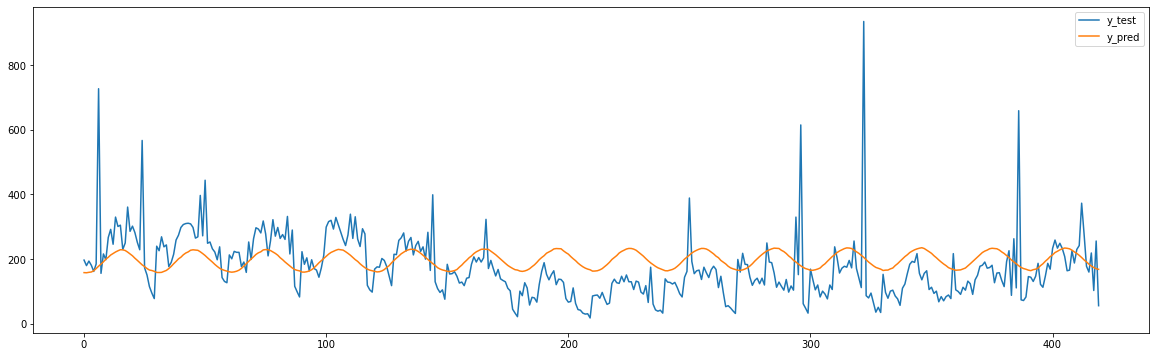

In [7]:
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=True)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])